# <center> Impulsive Noise Removal Using PWL Filters </center>

**<center> Devinn Doering, Nathan Hartman </center>**

*<center> ON DESCRIPTION OF IMPULSIVE NOISE REMOVAL USING PWL FILTER MODEL </center>*

### Table of Contents
1. [Problem Overview](#problem-overview)
2. [Generation of Test Data](#generation-of-test-data)
3. [Filter Model](#filter-model)
    * a. [Observations](#observations)
    * b. [Rudimentary Model](#rudimentary-model)
    * c. [Model Refinement](#model-refinement)
4. [Implementation](#implementation)
5. [Filter Performance](#filter-performance)
    * a. [Image 1 Results](#image-1-results)
    * b. [Image 2 Results](#image-2-results)
    * c. [Image 3 Results](#image-3-results)

### Problem Overview
A very common source of noise in the generation and transmission of signals is in the form of impulsive noise. In images, impulsive noise manifests as discrete, isolated pixel variations that often appear random. Obviously, noise of this form decreases signal quality and so it is beneficial to identify and remove the impulsive noise from the received image.

Traditionally, impulsive noise removal consists of two steps:
1. Impulse Detection
2. Estimation of Correct Value

Firstly, we identify the pixels that are affected by impulsive noise. Next, we estimate the value of that pixel prior to the addition of the noise. Our paper provides a filter model that can intuitively detect the impulsive noise and also a method of estimation for the corrupted pixels.

### Generation of Test Data
To replicate the results of our paper, we use commonly recognizable 256 x 256 pixel, grayscale images to illustrate the visual performance of the algorithm. We selected three images to use.

<center><img src="images/pic1.jpg"/></center>
<p style="text-align: center"><i>Image 1</i></p>

<center><img src="images/pic2.jpg"/></center>
<p style="text-align: center"><i>Image 2</i></p>

<center><img src="images/pic3.jpg"/></center>
<p style="text-align: center"><i>Image 3</i></p>

To introduce noise to these images, we randomly choose pixels to add an impulsive noise to, by either decreasing or increasing the value of that pixel. This allows us to very easily generate good test data for our filter.

### Filter Model
#### Observations
To perform the impulsive noise detection and correct the noisy image, we follow the filter model described by our publication. We first recognize that an image that is corrupted with random, discrete impulsive noise appears as:
$$ x_{i,j} = 
  \begin{cases}
    s_{i,j}, & 1 - p,\\
    s_{i,j} + i_{i,j}, & p
  \end{cases}
$$

Where $s_{i,j}$ is the original image signal for some pixel with indices {i,j}, $i_{i,j}$ is the impulsive noise for that pixel and $p$ is the probability that an arbitrary pixel is corrupted by noise. Now, we see that $x_{i,j}$ is a piecewise-linear (PWL) function.

#### Rudimentary Model
As a first approach to the detection and removal of this impulsive noise from the image, we can take advantage of the difference in value between a corrupted pixel and the mean of the region in which it resides.

To detect the presence of an impulse on a given pixel, we compare the value of that pixel, $x_{i,j}$ with the mean value of pixels in that region, $m_{i,j}$. If we find that $x_{i,j}$ is sufficiently different from $m_{i,j}$, *i.e. $x_{i,j} > m_{i,j} + \beta$ or $x_{i,j} < m_{i,j} - \beta$*, where $\beta$ is the detection threshold, then we adjust $x_{i,j}$ to be closer to the mean. We can apply this rudimentary filter model to produce $y_{i,j}$ as:
$$ y_{i,j} = 
  \begin{cases}
    m_{i,j} + \beta, & x_{i,j} \gt m_{i,j} + \beta,\\
    x_{i,j} + \beta, & x_{i,j} \in [m_{i,j} - \beta, m_{i,j} + \beta],\\
    m_{i,j} - \beta, & x_{i,j} \lt m_{i,j} - \beta\\
  \end{cases}
$$

This model is a good first approach but we see that the output of the filter depends largely on the value of the detection threshold, $\beta$ and varying this threshold can greatly influence the filter output.

#### Model Refinement
To avoid the value of the detection threshold having such a large effect on the filter output, we can refine our filter model to depend on two variables, $\beta$ and $\delta$. Now, $\beta$ is still the detection threshold and $\delta$ is a parameter controlling how much the filter smooths data over the the detection threshold. This modification to the filter model reduces the local bias that was present in the rudimentary model and improves the filter output. In this improved model, we can consider five different regions for the pixel value and $y_{i,j}$ becomes:
$$ y_{i,j} = 
  \begin{cases}
    m_{i,j}, & x \gt m_{i,j} + \beta + \delta,\\
    m_{i,j} + \frac{\beta}{\delta}(m_{i,j} + \beta + \delta - x_{i,j}), & x_{i,j} \in [m_{i,j} + \beta, m_{i,j} + \beta + \delta],\\
    x_{i,j}, & x_{i,j} \in [m_{i,j} - \beta, m_{i,j} + \beta],\\
    m_{i,j} - \frac{\beta}{\delta}(m_{i,j} + \beta + \delta - x_{i,j}), & x_{i,j} \in [m_{i,j} - \beta - \delta, m_{i,j} - \beta],\\
    m_{i,j}, & x_{i,j} \lt m_{i,j} - \beta - \delta\\
  \end{cases}
$$

Now, we see that the local bias is reduced by the presence of delta which leads to a much better result. Additionally, this filter model has an easy implementation for all pixels:

$$ y_{i,j} = 
\frac{1}{2}(m_{i,j} + \beta + x_{i,j} - |m_{i,j} + \beta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} - \beta + x_{i,j} + |m_{i,j} - \beta - x_{i,j}|)\\
- x_{i,j}\frac{\beta}{\delta}[\frac{1}{2}(m_{i,j} + \beta + x_{i,j} - |m_{i,j} + \beta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} - \beta + x_{i,j} + |m_{i,j} - \beta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} - \beta - \delta + x_{i,j} - |m_{i,j} - \beta - \delta - x_{i,j}|)\\
+ \frac{1}{2}(m_{i,j} + \beta + \delta + x_{i,j} + |m_{i,j} + \beta + \delta - x_{i,j}|)\\
- 2x_{i,j} - 2m_{i,j}]
$$



### Implementation

We are implementing our filter in python, using the Python package Pillow to read and write to images and Numpy for array operations. Firstly, we can use Pillow to load images from a file and then store this image data into a Numpy array. We notice, that since the images are formatted in RGB (3 bytes per pixel) but are grayscale images, the RGB values for each pixel are the same. Therefore, we condense the image data into a smallar array (1 byte per pixel) to make it easier to work with. This is done in the *load_image* function, below.

Similarly, we can return this condensed image data (1 byte per pixel) to RGB image data by simply setting the RGB value for each pixel to the grayscale value. This is done using the *create_image* function, below.

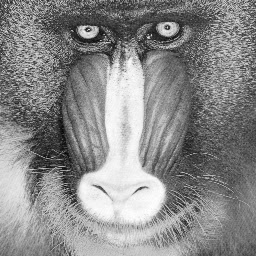

In [353]:
import numpy as np
import pathlib as pl
from PIL import Image

def load_image(path: pl.Path) -> np.ndarray:
  """
  Load 'm x n x 3' RGB image to 'm x n' numpy ndarray
  """
  image = Image.open(path)
  data = np.asarray(image)
  out = np.ndarray((len(data), len(data[0])))
  for i in range(len(data)):
    for j in range(len(data[0])):
      out[i][j] = data[i][j][0]
  return out

def create_image(data: np.ndarray) -> Image:
  """
  Create 'm x n x 3' RGB image from 'm x n' numpy ndarray
  """
  arr = np.ndarray((len(data), len(data[0]), 3))
  for i in range(len(data)):
    for j in range(len(data[0])):
      arr[i][j][0] = data[i][j]
      arr[i][j][1] = data[i][j]
      arr[i][j][2] = data[i][j]
      if (data[i][j] > 255 or data[i][j] < 0):
        print(f"Found bad value: {i}, {j}, {data[i][j]}")
  image = Image.fromarray(arr.astype(np.uint8))
  return image

original_data = load_image("images/pic3.jpg")
original_image = create_image(original_data)
original_image.show()

Now that we have our image data loaded, we want to introduce impulsive noise to the image to generate a valid test image. To do this, we introduce impulsive noise to the image by selecting pixels to be "corrupted" with a probability $p$. Then, we take these pixels that are designated to be "corrupted" and add an impulse to their grayscale value. To allow for both positive and negative impulsive noise, we wrap around the resulting RBG value.  

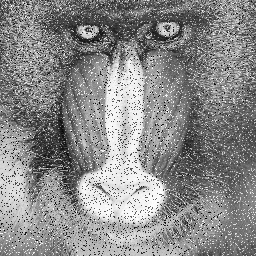

In [354]:
def apply_impulsive_noise(image_data: np.ndarray, amplitude, probability) -> np.ndarray:
  """
  Apply impulsive noise to image data
  """
  for i in range(len(image_data)):
    for j in range(len(image_data[0])):
      if (np.random.random() < probability):
          image_data[i][j] = (image_data[i][j] + amplitude) % 255
  return image_data

data = np.copy(original_data)
noisy_data = apply_impulsive_noise(data, 100, 0.1)
noisy_image = create_image(noisy_data)
noisy_image.show()

Next, we can calculate the mean value for each pixel within a 3x3 window. As was previously mentioned in the explaination out the filter model, this mean value will be used to determine when pixels contain noise and to estimate the original value for the pixel.

To calculate the mean for pixels on the edges, we only take the mean of the pixels within the image. Then, for pixels near the centre of the image, we will be taking the mean over 9 different grayscale values but for the pixels near the corner or the edge of the image, we will be taking the mean of fewer values (4 or 6) since the window is cut off by the edge of the image. Calculating the mean value for the pixel at indices $i,j$ is done in the *get_mean* function below.

In [355]:

def get_mean(x: np.ndarray, i, j):
  """
  Calculate mean of pixel accounting for boundaries
  """
  mean = 0
  count = 1
  if i > 0 and j > 0:
    mean += x[i-1][j-1]
    count += 1
  if i > 0:
    mean += x[i-1][j]
    count += 1
  if i > 0 and j < len(x[0]) - 1:
    mean += x[i-1][j+1]
    count += 1
  if i < len(x) - 1 and j < len(x[0]) - 1:
    mean += x[i+1][j+1]
    count += 1
  if i < len(x) - 1:
    mean += x[i+1][j]
    count += 1
  if i < len(x) - 1 and j > 0:
    mean += x[i+1][j-1]
    count += 1
  if j < len(x[0]) - 1:
    mean += x[i][j+1]
    count += 1
  if j > 0:
    mean += x[i][j-1]
    count += 1
  mean += x[i][j]
  mean /= count
  return mean


As an aside, to illustrate the usage of this *get_mean* function, we can construct an image out of the mean value for each pixel. What we see is a smoothed out or softened version of the original image, where local extremes are toned down to the mean for the 3x3 window around that pixel.

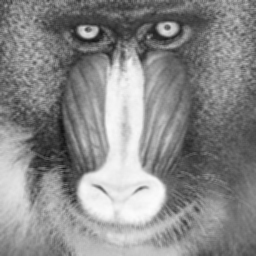

In [356]:
mean_data = np.copy(original_data)
for i in range(len(original_data)):
  for j in range(len(original_data[0])):
    mean_data[i][j] = get_mean(original_data, i, j)
mean_image = create_image(mean_data)
mean_image.show()


Now, that we have a way of finding the mean values for the image, we can test our filter models. First, we want to test the rudimentary filter for a baseline. This way, we can see what the minimum attempt at filtering this data produces. We see that the rudimentary filter is somewhat successful at identifying which pixels are corrupted but then it is relatively poor at estimating the correct value for that pixel. This makes sense since we again see that the detection threshold, $\beta$ has a large influence on the estimation for the corrupted pixel.

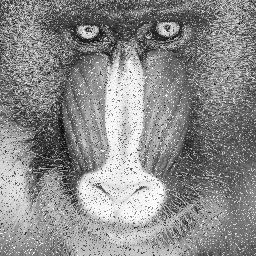

In [357]:
def apply_rudimentary_filter(x: np.ndarray, beta):
  """
  Apply rudimentary version of the filter, with only a beta value
  """
  filtered = np.copy(x)
  for i in range(len(x)):
    for j in range(len(x[0])):

      m = get_mean(x, i, j)
      if filtered[i][j] > m + beta:
        filtered[i][j] = m + beta
      elif filtered[i][j] < m - beta:
        filtered[i][j] = m - beta

      if filtered[i][j] > 255: filtered[i][j] = 255
      if filtered[i][j] < 0:   filtered[i][j] = 0

  return filtered

rudimentary_data = apply_rudimentary_filter(noisy_data, 70)
rudimentary_image = create_image(rudimentary_data)
rudimentary_image.show()

Finally, we implement the refined filter model and inspect the results. To implement the refined filter, we use the equation that was outlined above to produce the value for each pixel. We use default values for $\beta$ and $\delta$ as was outlined in the simulation done by the original authors.

We see a much better result than the rudimentary filter with most of the noise filtered out. Unfortunately, there are still artifacts in the image due to the local mean being influenced by the impulsive noise values.

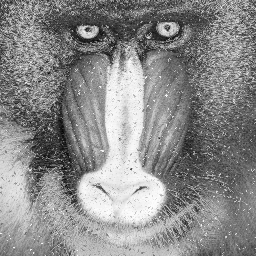

In [358]:
def apply_filter(x: np.ndarray, beta, delta):
  """
  Apply filter
  """
  filtered = np.copy(x)
  for i in range(len(x)):
    for j in range(len(x[0])):

      m = get_mean(x, i, j)
      filtered[i][j] = m - ((beta + delta) / (2 * delta)) * abs( m + beta - x[i][j] ) \
                     + ((beta + delta) / (2 * delta)) * abs( m - beta - x[i][j]) \
                     - (beta) / (2 * delta) * abs(m - beta - delta - x[i][j]) \
                     + (beta) / (2 * delta) * abs(m + beta + delta - x[i][j])
      if filtered[i][j] > 255: filtered[i][j] = 255
      if filtered[i][j] < 0:   filtered[i][j] = 0

  return filtered

filtered_data = apply_filter(noisy_data, 70, 1)
filtered_image = create_image(filtered_data)
filtered_image.show()
  

### Filter Performance

To gauge the performance of the filter, we can take the average difference in the grayscale values for each pixel over the entire image. What this gives us is a rough permormance metric for the filter, as obviously a better filter will produce an image that is closest to the original image. 

To compute this performance metric, we use the following *calculate_image_difference* function.

In [359]:
def calculate_image_difference(x: np.ndarray, y: np.ndarray):
  """
  Find's the average RGB difference per pixel for the two images.
  In other words, calculates a "score" for a filter to see how
  the filtered image compares to the original
  """
  assert len(x) == len(y)
  assert len(x[0]) == len(y[0])

  diff = 0
  for i in range(len(x)):
    for j in range(len(x[0])):
      diff += abs(x[i][j] - y[i][j]) 

  return diff / (len(x) * len(x[0]))

Now, we can test the performance of the filter for various values of $\beta$ and $\delta$ for our three images to see what is the best performance we can obtain and with what $\beta$ and $\delta$ values. We first test for $\beta$ values of $20, 40, 60, 80$ and $\delta$ values of $1, 2, 5, 10$. Testing our three images for varying $\beta$ and $\delta$ produces:

##### Image 1 Results
| Beta  | Delta | Result | Delta  | Result  | Delta | Result  | Delta | Result  | Best Result| 
|-------|-------|--------|--------|---------|-------|---------|-------|---------|------------|
| 20    | 1     |  7.22  | 2      | 7.05    |  5    |  6.28   | 10    |  5.67   |  5.67      |
| 40    | 1     |  2.95  | 2      | 2.93    |  5    |  2.85   | 10    |  2.73   |  2.73      |
| 60    | 1     |  2.54  | 2      | 2.55    |  5    |  2.59   | 10    |  2.83   |  2.54      |
| 80    | 1     |  5.84  | 2      | 5.91    |  5    |  6.11   | 10    |  6.61   |  5.84      |

For image 1, we see that the best results come with $\beta$ = 60, $\delta$ = 1. If we fine tune this, we can find that for this image, the best values are acutally $\beta$ = 55, $\delta$ = 1. For these values, we get an average difference of 2.52 per pixel, and we see that the image that is produced by these parameters is quite good!

<center><img src="images/pic1_noisy.jpg"/></center>
<p style="text-align: center"><i>Image 1 Noisy</i></p>

<center><img src="images/pic1_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 1 Filtered</i></p>

##### Image 2 Results
| Beta  | Delta | Result | Delta  | Result  | Delta | Result  | Delta | Result  | Best Result| 
|-------|-------|--------|--------|---------|-------|---------|-------|---------|------------|
| 20    | 1     |  9.88  | 2      | 9.71    |  5    |  9.17   | 10    |  8.57   |  8.57      |
| 40    | 1     |  4.67  | 2      | 4.61    |  5    |  4.45   | 10    |  4.23   |  4.23      |
| 60    | 1     |  3.31  | 2      | 3.31    |  5    |  3.34   | 10    |  3.48   |  3.31      |
| 80    | 1     |  5.29  | 2      | 5.36    |  5    |  5.57   | 10    |  6.01   |  5.29      |

For image 2, we see that the best results come with $\beta$ = 60, $\delta$ = 1. Again, by fine tuning these results, we find beta doesn't change and we still have $\beta$ = 60, $\delta$ = 1 as best. For these values, we get an average difference of 3.31 per pixel.

<center><img src="images/pic2_noisy.jpg"/></center>
<p style="text-align: center"><i>Image 2 Noisy</i></p>

<center><img src="images/pic2_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 2 Filtered</i></p>

##### Image 3 Results
| Beta  | Delta | Result | Delta  | Result  | Delta | Result  | Delta | Result  | Best Result| 
|-------|-------|--------|--------|---------|-------|---------|-------|---------|------------|
| 20    | 1     |  15.53 | 2      | 15.34   |  5    |  14.81  | 10    |  14.06  |  14.06     |
| 40    | 1     |  8.45  | 2      | 8.32    |  5    |  7.98   | 10    |  7.51   |  7.51      |
| 60    | 1     |  5.20  | 2      | 5.16    |  5    |  5.10   | 10    |  5.07   |  5.07      |
| 80    | 1     |  5.78  | 2      | 5.83    |  5    |  5.98   | 10    |  6.23   |  5.78      |

For image 3, we see that the best results come with $\beta$ = 60 but this time with $\delta$ = 10. But, when we fine tune these results, we find $\beta$ = 65 $\delta$ = 1 is best. For these values, we get an average difference of 4.98 per pixel.

<center><img src="images/pic3_noisy.jpg"/></center>
<p style="text-align: center"><i>Image 3 Noisy</i></p>

<center><img src="images/pic3_filtered.jpg"/></center>
<p style="text-align: center"><i>Image 3 Filtered</i></p>


So we see overall, having a small $\delta$ value of around 1 produces the best result for all images but each image has a slightly different optimal $\beta$ value, normally around 60.
We experimented with smaller $\delta$ values but didn't seem to get any significant increase in performance.

### Conclusion
Overall, we can see that the method described for filtering out impulsive noise in the paper was fairly successful.